In [50]:
import pandas as pd
import numpy as np

In [52]:
# Ejercicio 1
# a)
def coefs_rl(x, y):
    # Calculamos las medias de x e y
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    # Calculamos la pendiente (beta_1)
    beta_1 = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar)**2)
    
    # Calculamos la ordenada al origen (beta_0)
    beta_0 = y_bar - beta_1 * x_bar
    
    return beta_1, beta_0

In [54]:
#b)
from gapminder import gapminder
from sklearn import linear_model
from formulaic import Formula

In [56]:
pip install formulaic

Note: you may need to restart the kernel to use updated packages.


In [57]:
datos = gapminder

In [58]:
datos

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [62]:
Argentina = datos[datos['country'] == 'Argentina']

In [64]:
Argentina

,country,continent,year,lifeExp,pop,gdpPercap
48,Argentina,Americas,1952,62.485,17876956,5911.315053
49,Argentina,Americas,1957,64.399,19610538,6856.856212
50,Argentina,Americas,1962,65.142,21283783,7133.166023
51,Argentina,Americas,1967,65.634,22934225,8052.953021
52,Argentina,Americas,1972,67.065,24779799,9443.038526
53,Argentina,Americas,1977,68.481,26983828,10079.026740
54,Argentina,Americas,1982,69.942,29341374,8997.897412
55,Argentina,Americas,1987,70.774,31620918,9139.671389
56,Argentina,Americas,1992,71.868,33958947,9308.418710
57,Argentina,Americas,1997,73.275,36203463,10967.281950


In [66]:
y, X = Formula('lifeExp ~ year').get_model_matrix(Argentina)

In [68]:
y

,lifeExp
48,62.485
49,64.399
50,65.142
51,65.634
52,67.065
53,68.481
54,69.942
55,70.774
56,71.868
57,73.275


In [70]:
X

,Intercept,year
48,1.0,1952
49,1.0,1957
50,1.0,1962
51,1.0,1967
52,1.0,1972
53,1.0,1977
54,1.0,1982
55,1.0,1987
56,1.0,1992
57,1.0,1997


In [72]:
modelo = linear_model.LinearRegression(fit_intercept=True)  # Usamos fit_intercept=True para incluir la intersección

In [74]:
modelo

LinearRegression()

In [76]:
modelo.fit(X, y)

LinearRegression()

In [78]:
# Obtener los coeficientes
beta_0 = modelo.intercept_  # Ordenada al origen
beta_1 = modelo.coef_[0]    # Pendiente

In [80]:
print(f"Beta_0 (ordenada al origen): {beta_0}")
print(f"Beta_1 (pendiente): {beta_1}")

Beta_0 (ordenada al origen): [-389.60634452]
Beta_1 (pendiente): [0.         0.23170839]


In [82]:
# Cargar el dataset gapminder
datos = gapminder

# Filtrar los datos solo para Argentina
argentina = datos[datos['country'] == 'Argentina']

# Aplicar la función coefs_rl para obtener los coeficientes de manera manual
beta_1, beta_0 = coefs_rl(argentina['year'], argentina['lifeExp'])
print(f"Coeficiente beta_1 (pendiente): {beta_1}, Coeficiente beta_0 (ordenada al origen): {beta_0}")

Coeficiente beta_1 (pendiente): 0.2317083916083916, Coeficiente beta_0 (ordenada al origen): -389.6063445221445


In [84]:
# Usamos formulaic para obtener las matrices del modelo
y, X = Formula('lifeExp ~ year').get_model_matrix(argentina)

# Inicializamos el modelo de regresión
modelo = linear_model.LinearRegression(fit_intercept=True)  # Usamos fit_intercept=True para incluir la intersección

# Ajustamos el modelo
modelo.fit(X, y)

# Obtener los coeficientes
beta_0_sklearn = modelo.intercept_  # Ordenada al origen
beta_1_sklearn = modelo.coef_[0]    # Pendiente

print(f"Coeficiente beta_1 (scikit-learn): {beta_1_sklearn}, Coeficiente beta_0 (scikit-learn): {beta_0_sklearn}")


Coeficiente beta_1 (scikit-learn): [0.         0.23170839], Coeficiente beta_0 (scikit-learn): [-389.60634452]


In [86]:
# Ejercicio 2
# a)
datos = pd.read_csv(r"C:\Users\Usuario\Downloads\inmuebles.csv")
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


In [88]:
import matplotlib.pyplot as plt
import seaborn.objects as so

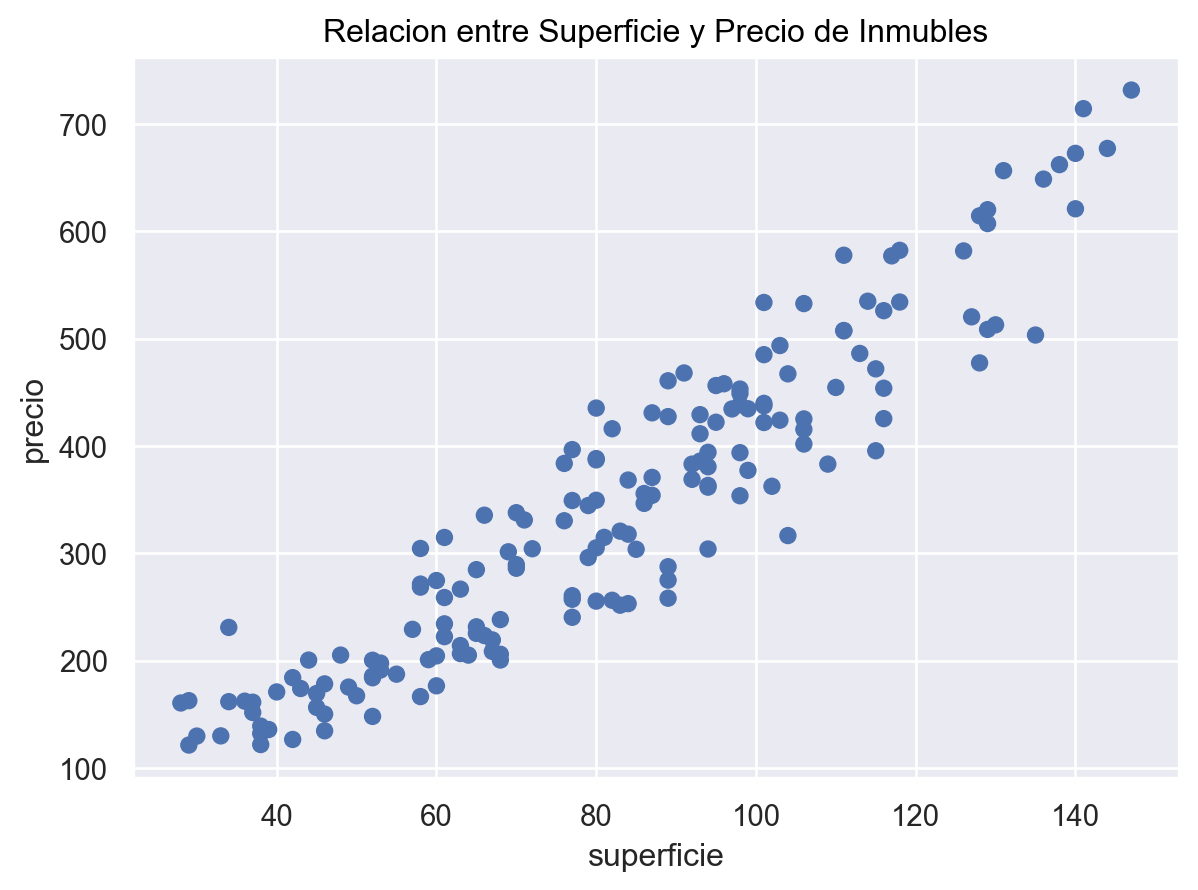

In [90]:
(
    so.Plot(datos, x="superficie", y="precio")
    .add(so.Dot())
    .label(title="Relacion entre Superficie y Precio de Inmubles")
)

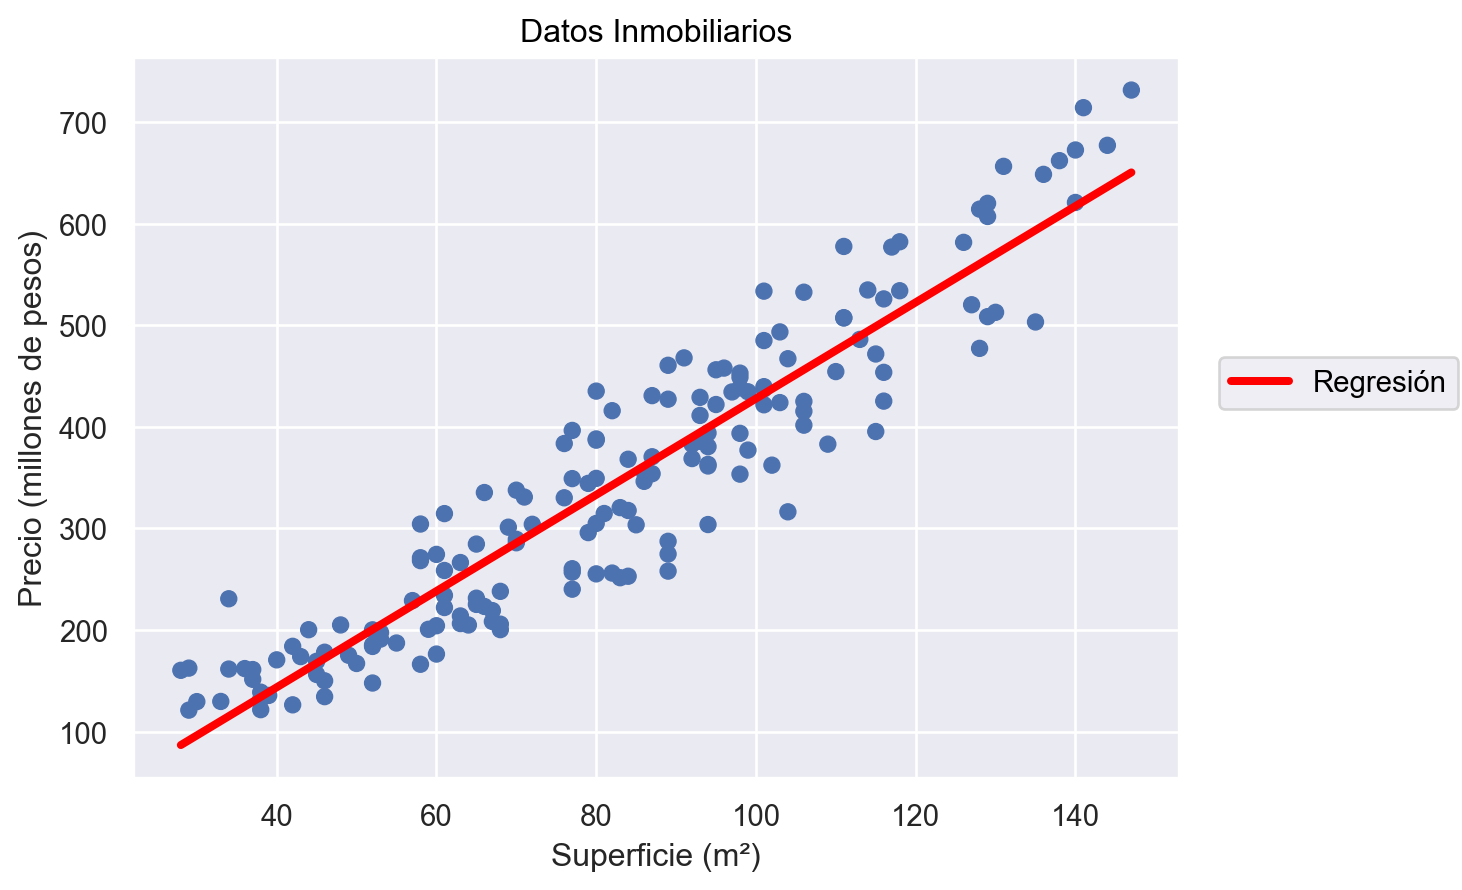

In [92]:
# b)
(
    so.Plot(datos, x="superficie", y="precio")
    .add(so.Dot())  # Los puntos de datos
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label="Regresión")  # Agregar la línea de regresión y su leyenda
    .label(title='Datos Inmobiliarios', x='Superficie (m²)', y='Precio (millones de pesos)')
)

In [93]:
# c)

# Obtenemos las matrices del modelo
y, X = Formula('precio ~ superficie').get_model_matrix(datos)

In [96]:
# Inicializamos el modelo de regresión.
modelo = linear_model.LinearRegression(fit_intercept=False) # RECORDAR USAR fit_intercept = False

# Realiza el ajuste
modelo.fit(X, y)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta = modelo.coef_
beta_0 = beta[0][0]
beta_1 = beta[0][1]
print('Beta_0: ', beta_0)
print('Beta_1: ', beta_1)

Beta_0:  -45.73153403092561
Beta_1:  4.7357968223023885


Entonces, la recta que mejor aproxima a los datos es (redondeando):
$$ Y = -45.732 + 4.736 X$$

Es decir que:
$$ Precio = -45.732 + 4.736 * Superficie $$

¿Qué significa esto en términos de costo por metro cuadrado?

- **Intersección (-45.732):**

Este valor es la intersección de la recta con el eje Y. En términos prácticos, indica que si la superficie fuera 0 m², el precio de la propiedad sería -45.732 millones de pesos. Sin embargo, este valor no tiene mucha relevancia práctica en el contexto de inmuebles, ya que no existen propiedades de 0 m². Es solo un punto en la ecuación que permite calcular el ajuste de la recta.

- **Pendiente (4.736):**

La pendiente de 4.736 significa que por cada metro cuadrado adicional de superficie, el precio de la propiedad aumenta en 4.736 millones de pesos. Es decir, a medida que aumenta el tamaño de la propiedad (en m²), el precio sube en 4.736 millones de pesos por cada metro cuadrado adicional.

In [101]:
# d)

def ecm(x, y, pendiente, o_origen):
    # Calcular los valores predichos (ŷ) de acuerdo a la recta
    y_pred = pendiente * x + o_origen

    # Calcular el ECM
    ecm = np.mean((y - y_pred) ** 2)

    return ecm

In [103]:
def r_cuadr(x, y, pendiente, o_origen):
    # Calcular los valores predichos (ŷ) de acuerdo a la recta
    y_pred = pendiente * x + o_origen
    
    # Calcular la media de los valores reales
    y_media = np.mean(y)

    # Calcular el numerador y denominador de R^2
    ss_res = np.sum((y_pred - y_media) ** 2)  # Suma de los residuos cuadrados
    ss_tot = np.sum((y - y_media) ** 2)  # Suma total de los cuadrados
    r2 = (ss_res / ss_tot)

    return r2   

In [105]:
# e) y f)
x = datos['superficie']
y = datos['precio']
pendiente = beta_1
o_origen = beta_0

In [107]:
# Calcular el ECM y R^2
ecm_value = ecm(x, y, pendiente, o_origen)
r2_value = r_cuadr(x, y, pendiente, o_origen)

In [109]:
print(f"ECM: {ecm_value}")
print(f"R^2: {r2_value}")

ECM: 2630.9300019446955
R^2: 0.8762114698357927


In [111]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = modelo.predict(X)
r2_score(datos['precio'], y_pred)

0.8762114698357936

In [113]:
mean_squared_error(datos['precio'], y_pred)

2630.9300019446955

**ECM (2630.93):**

- El Error Cuadrático Medio (ECM) es una medida del error cuadrático promedio entre los valores reales y los predichos. Un valor de 2630.93 (millones de pesos)² indica que, en promedio, las predicciones del modelo se desvían de los valores reales por aproximadamente 2630.93 millones de pesos al cuadrado.

- En términos prácticos, esto significa que el modelo tiene un error cuadrático significativo, pero el valor no es lo suficientemente alto como para indicar un ajuste muy malo. Sin embargo, siempre es recomendable buscar reducir el ECM para mejorar la precisión del modelo.

**R2=0.8762:**

- El 𝑅2 de 0.8762 indica que el modelo de regresión lineal explica aproximadamente el 87.6% de la variabilidad en los precios de los inmuebles en función de la superficie. Esto es un valor bastante bueno, ya que el modelo está capturando una gran parte de la variabilidad de los precios.

- R2 cercano a 1 significa que el modelo es muy bueno para predecir los precios basados en la superficie, mientras que valores cercanos a 0 indicarían que el modelo no es adecuado.

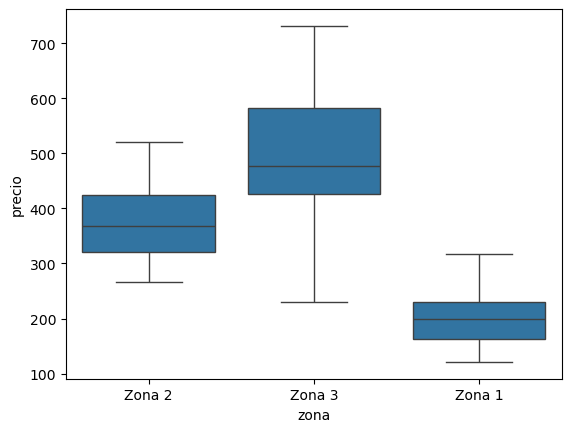

In [116]:
# g)
import seaborn as sns
sns.boxplot(data = datos, x="zona", y="precio")
plt.show()

In [118]:
# h)
# Obtenemos las matrices del modelo
y, X = Formula('precio ~ zona').get_model_matrix(datos)

# Inicializamos el modelo de regresión.
modelo = linear_model.LinearRegression(fit_intercept=False) # RECORDAR USAR fit_intercept = False

# Definir las funciones para calcular ECM y R^2
def ecm(y, y_pred):
    return mean_squared_error(y, y_pred)

def r_cuad(y, y_pred):
    return r2_score(y, y_pred)

resultados = []
zonas = datos['zona'].unique()
for zona in zonas:
    # Filtrar los datos de la zona
    zona_datos = datos[datos['zona'] == zona]
    
    # Definir las variables X (superficie) y y (precio)
    X = zona_datos['superficie'].values.reshape(-1, 1)
    y = zona_datos['precio'].values
    
    # Ajustar el modelo de regresión lineal
    modelo.fit(X, y)
    
    # Obtener los coeficientes de la recta
    pendiente = modelo.coef_[0]
    interseccion = modelo.intercept_
    
    # Hacer las predicciones
    y_pred = modelo.predict(X)
    
    # Calcular el ECM y R^2
    ecm_value = ecm(y, y_pred)
    r2_value = r_cuad(y, y_pred)
    
    # Almacenar los resultados
    resultados.append({
        'Zona': zona,
        'Pendiente': pendiente,
        'Intersección': interseccion,
        'ECM': ecm_value,
        'R^2': r2_value
    })

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar los resultados
print(resultados_df)

zona_datos
X, y, pendiente

     Zona  Pendiente  Intersección         ECM       R^2
0  Zona 2   4.042735           0.0  892.649198  0.804429
1  Zona 3   4.788986           0.0  782.735990  0.942059
2  Zona 1   3.378757           0.0  650.063823  0.717238


(array([[ 60.],
        [ 42.],
        [ 37.],
        [ 42.],
        [ 82.],
        [ 29.],
        [ 48.],
        [ 38.],
        [ 83.],
        [ 46.],
        [ 66.],
        [ 80.],
        [ 29.],
        [ 68.],
        [ 84.],
        [ 46.],
        [ 67.],
        [ 50.],
        [ 63.],
        [ 53.],
        [ 63.],
        [ 61.],
        [ 49.],
        [ 89.],
        [ 65.],
        [ 64.],
        [ 60.],
        [ 33.],
        [ 28.],
        [ 52.],
        [ 52.],
        [ 53.],
        [ 55.],
        [ 58.],
        [ 45.],
        [ 30.],
        [ 52.],
        [ 57.],
        [ 45.],
        [ 38.],
        [ 59.],
        [ 38.],
        [ 94.],
        [ 34.],
        [ 68.],
        [ 77.],
        [ 85.],
        [ 89.],
        [ 65.],
        [ 36.],
        [ 77.],
        [ 46.],
        [104.],
        [ 61.],
        [ 89.],
        [ 39.],
        [ 67.],
        [ 77.],
        [ 44.],
        [ 68.],
        [ 40.],
        [ 43.],
        

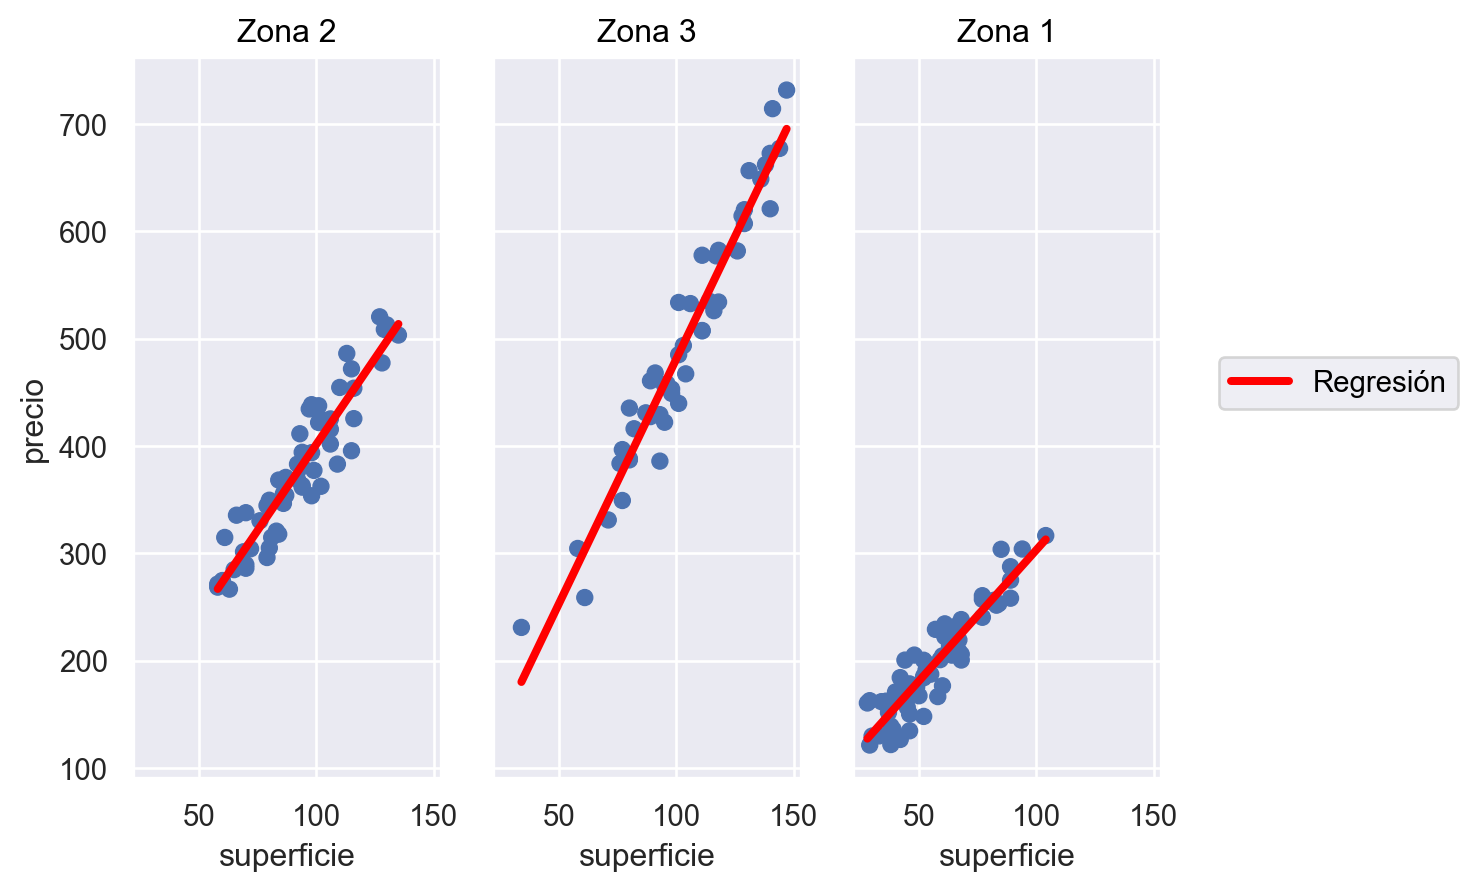

In [120]:
# i)
(
    so.Plot(datos, x="superficie", y="precio")
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label="Regresión")  # Agregar la línea de regresión y su leyenda
    .facet("zona", wrap=3)
)

In [121]:
# Ejercicio 3
import seaborn as sns
import statsmodels.api as sm

# Cargar dataset
datos = sns.load_dataset('tips')

# Definir X centrada y Y
X = datos['total_bill'] - datos['total_bill'].mean()
Y = datos['tip']

# Agregar constante para el intercepto
X_con_const = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(Y, X_con_const).fit()
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           6.69e-34
Time:                        19:00:14   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9983      0.065     45.824      0.0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18704\729089624.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_2021['days'] = (btc_2021['Date'] - pd.to_datetime("2021-01-01")).dt.days
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18704\729089624.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_2021['pred'] = modelo.predict(X)


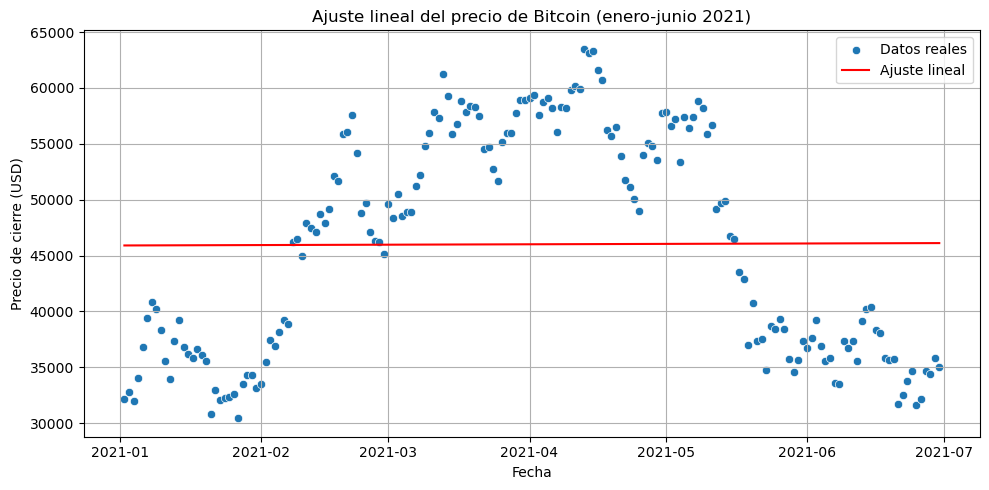

In [124]:
# Ejercicio 4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargamos el dataset
btc = pd.read_csv(r"C:\Users\Usuario\Downloads\bitcoin.csv")

# Aseguramos el formato de la fecha
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

# Filtramos el período
btc_2021 = btc[(btc['Date'] > "2021-01-01") & (btc['Date'] < "2021-07-01")]

# Convertimos las fechas a números (número de días desde el inicio del período)
btc_2021['days'] = (btc_2021['Date'] - pd.to_datetime("2021-01-01")).dt.days

# Ajuste lineal
X = btc_2021[['days']]
y = btc_2021['Close']

modelo = LinearRegression().fit(X, y)

# Predicciones
btc_2021['pred'] = modelo.predict(X)

# Gráfico
plt.figure(figsize=(10, 5))
sns.scatterplot(data=btc_2021, x='Date', y='Close', label='Datos reales')
sns.lineplot(data=btc_2021, x='Date', y='pred', label='Ajuste lineal', color='red')
plt.title("Ajuste lineal del precio de Bitcoin (enero-junio 2021)")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
#Ejercicio 5

# Cargar datos y filtrar Japón
df = sns.load_dataset('healthexp')
japan = df[df['Country'] == 'Japan']
japan.head()

,Year,Country,Spending_USD,Life_Expectancy
3,1970,Japan,150.437,72.0
8,1971,Japan,163.854,72.9
11,1972,Japan,185.390,73.2
14,1973,Japan,205.778,73.4
17,1974,Japan,242.018,73.7


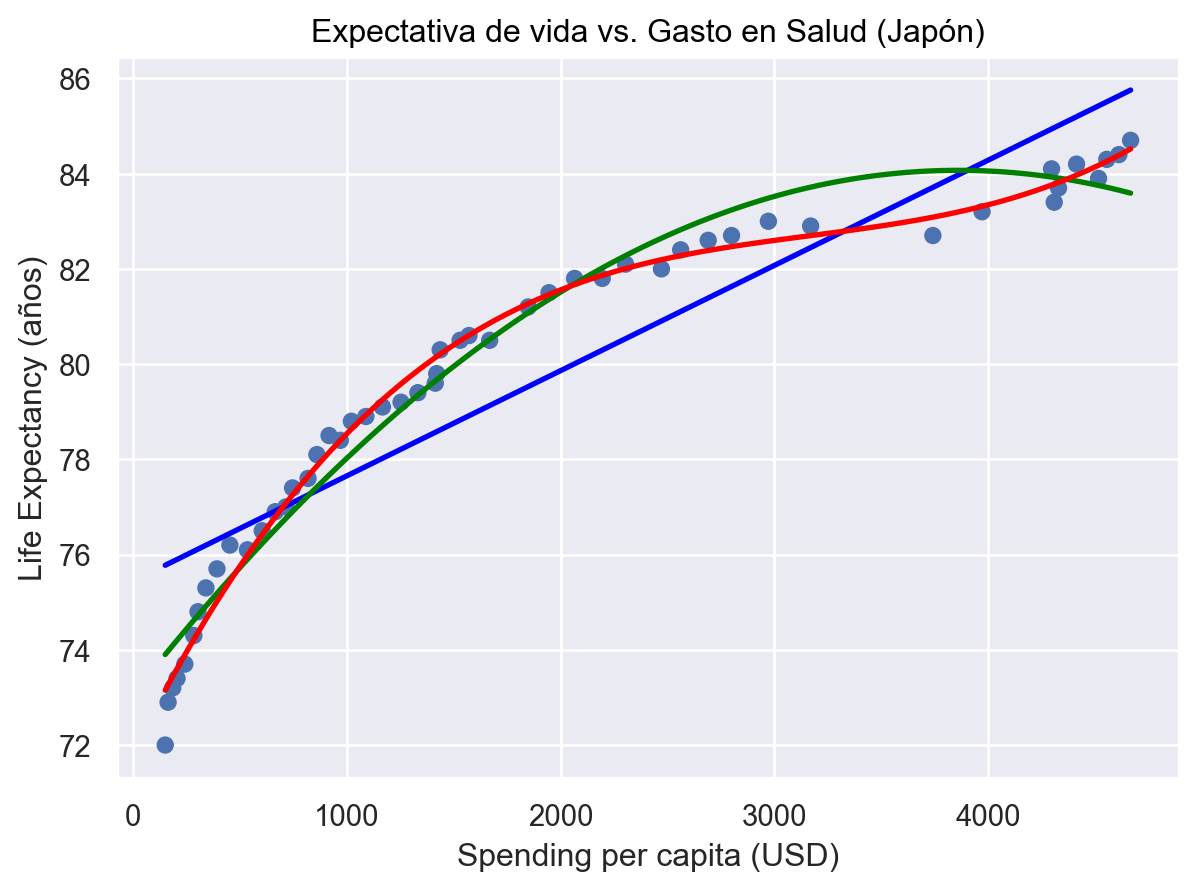

In [134]:
(
    so.Plot(data=japan, x='Spending_USD', y='Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='blue', linewidth=2), so.PolyFit(1))
    .add(so.Line(color='green', linewidth=2), so.PolyFit(2))
    .add(so.Line(color='red', linewidth=2), so.PolyFit(3))
    .label(
        title='Expectativa de vida vs. Gasto en Salud (Japón)',
        x='Spending per capita (USD)',
        y='Life Expectancy (años)'
    )
)

In [146]:
# Escribimos la fórmula
y, X = Formula('Spending_USD ~ Life_Expectancy').get_model_matrix(japan)

# Inicializamos el modelo de regresión
modelo = linear_model.LinearRegression(fit_intercept=False)

# Realizamos el ajuste
modelo.fit(X, y)

LinearRegression(fit_intercept=False)

In [189]:
# poly(year,3) significa que usamos un polinomio de grado 3 cuya variable es Spending_
y, X = Formula('Life_Expectancy ~ poly(Spending_USD, 3, raw=True) - 1').get_model_matrix(japan)

In [191]:
X.head()

,"poly(Spending_USD, 3, raw=True)[0]","poly(Spending_USD, 3, raw=True)[1]","poly(Spending_USD, 3, raw=True)[2]"
3,150.437,22631.290969,3.404584e+06
8,163.854,26848.133316,4.399174e+06
11,185.390,34369.452100,6.371753e+06
14,205.778,42344.585284,8.713584e+06
17,242.018,58572.712324,1.417565e+07


In [193]:
y.head()

,Life_Expectancy
3,72.0
8,72.9
11,73.2
14,73.4
17,73.7


In [195]:
# Inicializamos el modelo de regresión. 
modelo = linear_model.LinearRegression(fit_intercept=True)

# Realiza el ajuste
modelo.fit(X, y)

# Como usamos fit_intercept = True, la ordenada al origen está en modelo.intercept_
ordenada_al_origen = modelo.intercept_[0]

# Recuperamos los valores de los demas coeficientes (de menor potencia a la mayor)
coeficientes = modelo.coef_[0]

# Armamos el array con los valores de beta
beta = np.array([ordenada_al_origen, *coeficientes])

# Imprimimos los valores:
print('beta_0: ', beta[0])
print('beta_1: ', beta[1])
print('beta_2: ', beta[2])
print('beta_3: ', beta[3])

beta_0:  71.84403247809703
beta_1:  0.009097662220296954
beta_2:  -2.6841733213796484e-06
beta_3:  2.8216848452782307e-10


El polinomio de grado a lo sumo 3 que mejor aproxima a los datos es:
$$P(x) = 71.844 + 0.0091 x -2.684 x^ 2 + 2.821 x^ 3 $$

In [205]:
modelo = LinearRegression().fit(X, y)
y_pred = modelo.predict(X)

In [207]:
ecm = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"ECM: {ecm:.4f}")
print(f"R²: {r2:.4f}")

ECM: 0.1076
R²: 0.9913


In [209]:
# Haciendo las cuentas a mano
x_nuevo = beta[0] + beta[1]*500 + beta[2]*500**2 + beta[3]*500**3

print('La Esperanza de vida si se invierte 500 USD en Japon es de: ', x_nuevo)

La Esperanza de vida si se invierte 500 USD en Japon es de:  75.75709131846658


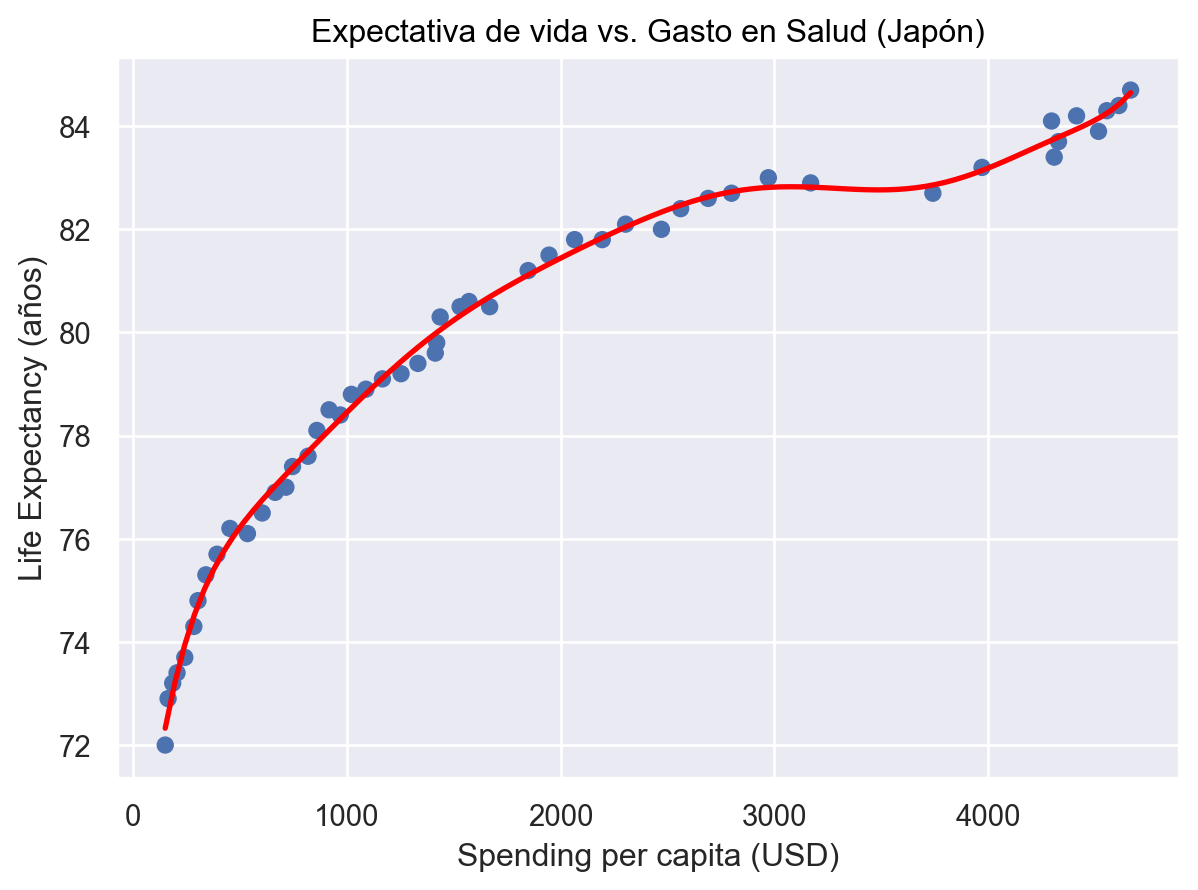

In [223]:
(
    so.Plot(data=japan, x='Spending_USD', y='Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(10))
    .label(
        title='Expectativa de vida vs. Gasto en Salud (Japón)',
        x='Spending per capita (USD)',
        y='Life Expectancy (años)'
    )
)

C:\Users\Usuario\anaconda3\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Usuario\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_stats\regression.py:30: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, self.order)


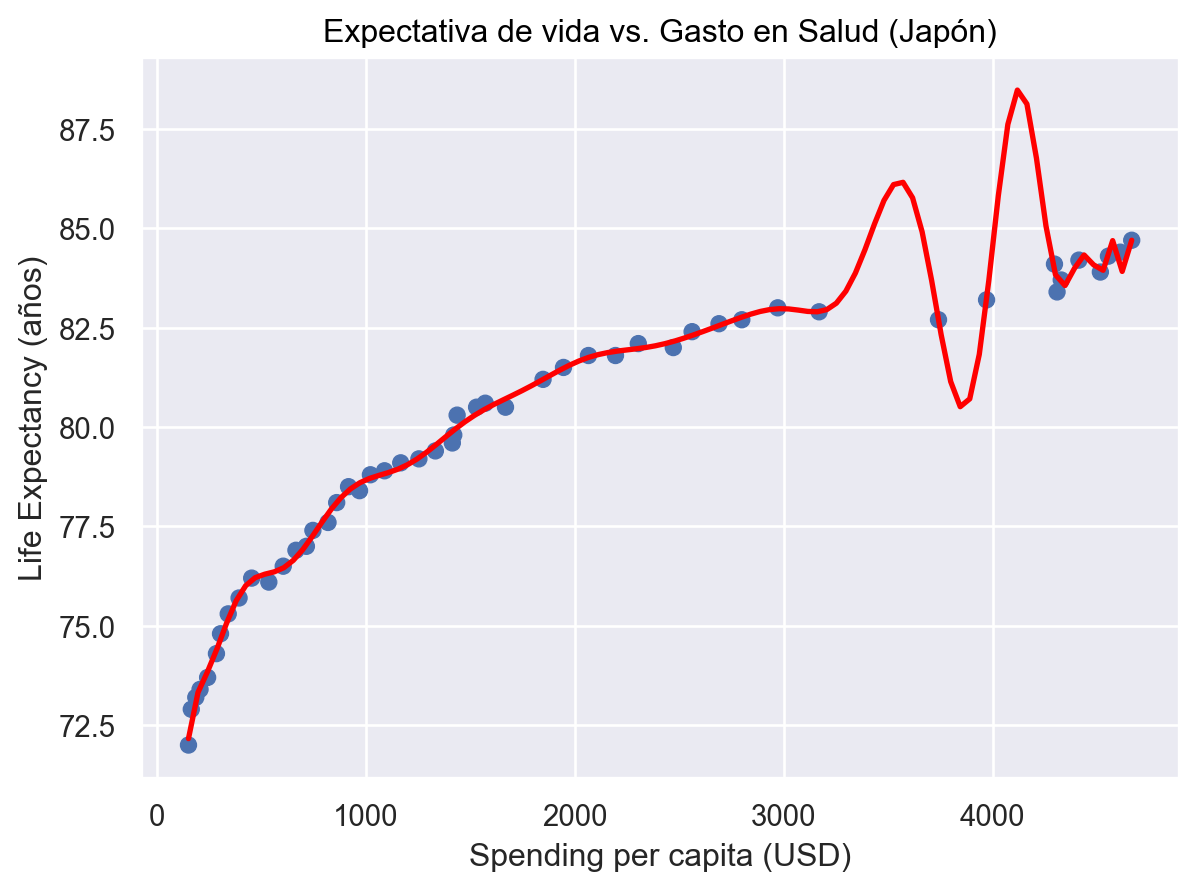

In [219]:
(
    so.Plot(data=japan, x='Spending_USD', y='Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(50))
    .label(
        title='Expectativa de vida vs. Gasto en Salud (Japón)',
        x='Spending per capita (USD)',
        y='Life Expectancy (años)'
    )
)